<a href="https://colab.research.google.com/github/NithinBommidi/Ml_project/blob/main/mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

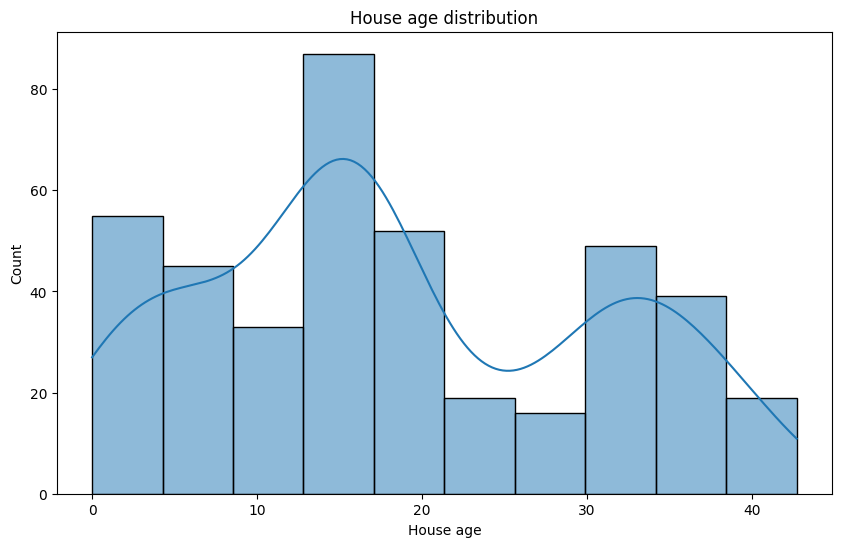

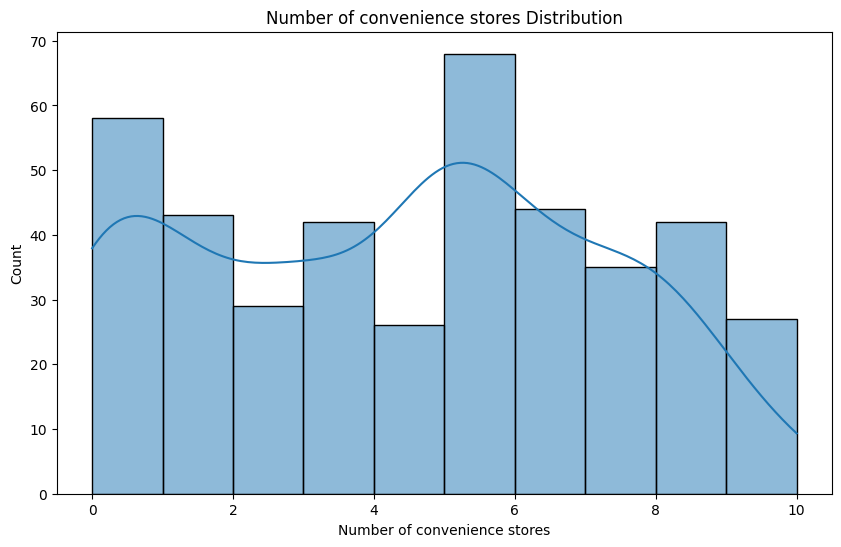

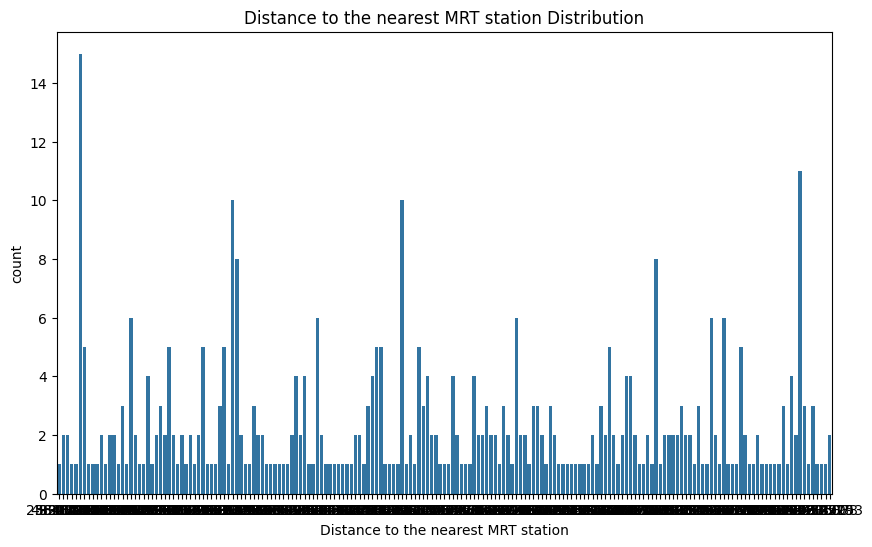

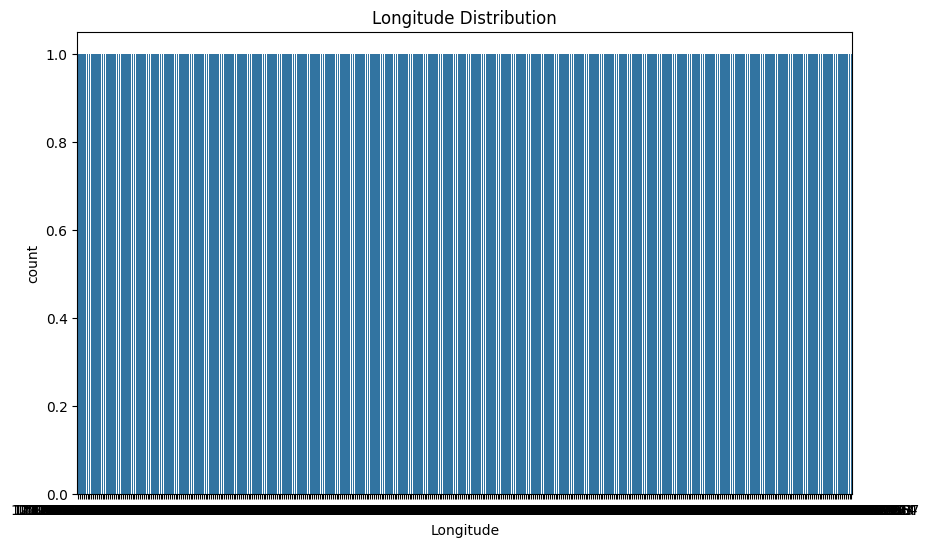

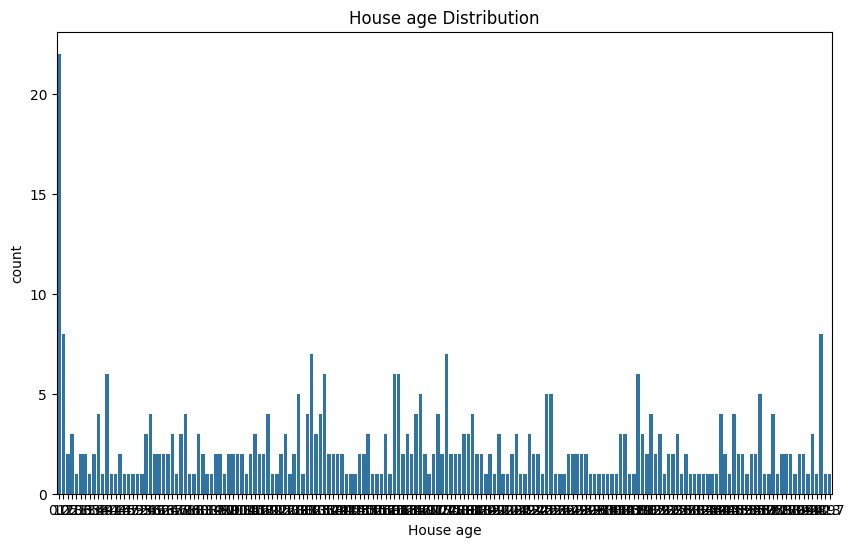

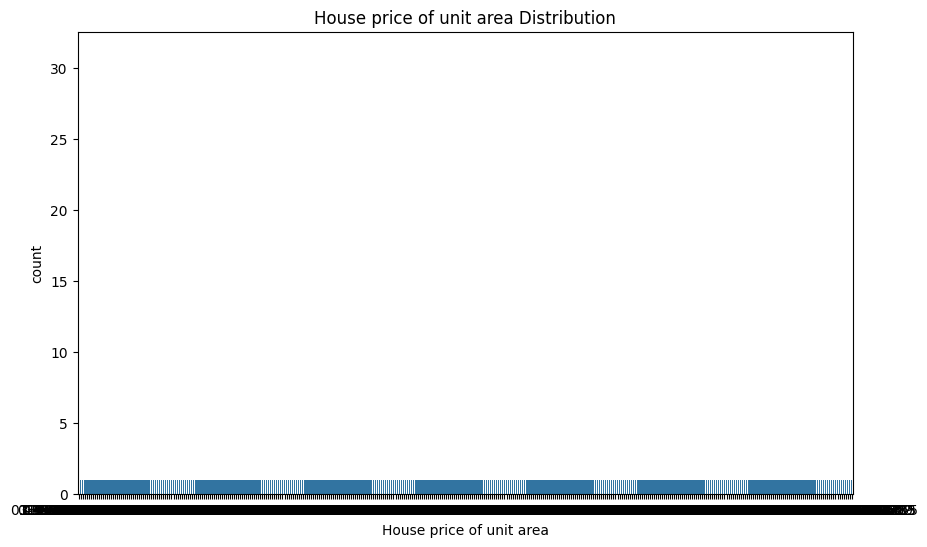

   Statistic            Transaction date   House age  \
0      count                         414  414.000000   
1     unique                         414         NaN   
2        top  2012-09-02 16:42:30.519336         NaN   
3       freq                           1         NaN   
4       mean                         NaN   18.405072   
5        std                         NaN   11.757670   
6        min                         NaN    0.000000   
7        25%                         NaN    9.900000   
8        50%                         NaN   16.450000   
9        75%                         NaN   30.375000   
10       max                         NaN   42.700000   

    Distance to the nearest MRT station  Number of convenience stores  \
0                            414.000000                    414.000000   
1                                   NaN                           NaN   
2                                   NaN                           NaN   
3                                  

In [1]:
#Perform Exploratory Data Analysis (EDA)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Real_Estate.csv'
input_0 = pd.read_csv(file_path)

# Define the invoke function
def invoke(input_0: pd.DataFrame) -> pd.DataFrame:
    '''
    input_0: pd.DataFrame placement-dataset.csv
    '''
    # Summary statistics
    summary_stats = input_0.describe(include='all')

    # Visualizations
    plt.figure(figsize=(10, 6))
    sns.histplot(data=input_0, x='House age', kde=True)
    plt.title('House age distribution')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(data=input_0, x='Number of convenience stores', kde=True)
    plt.title('Number of convenience stores Distribution')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.countplot(data=input_0, x='Distance to the nearest MRT station')
    plt.title('Distance to the nearest MRT station Distribution')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.countplot(data=input_0, x='Longitude') # Fixed typo here
    plt.title('Longitude Distribution') # Fixed typo here
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.countplot(data=input_0, x='House age')
    plt.title('House age Distribution')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.countplot(data=input_0, x='House price of unit area')
    plt.title('House price of unit area Distribution')
    plt.show()

    # Select only numeric columns for correlation
    numeric_input = input_0.select_dtypes(include=['float', 'int'])

    # Correlation matrix
    correlation_matrix = numeric_input.corr()

    # Combine summary statistics and correlation matrix into one DataFrame
    summary_stats_df = summary_stats.reset_index().rename(columns={'index': 'Statistic'})
    correlation_matrix_df = correlation_matrix.reset_index().rename(columns={'index': 'Variable'})

    output = pd.concat([summary_stats_df, correlation_matrix_df], axis=1)

    return output

# Call the invoke function and get the result
output_df = invoke(input_0)

# Display the output DataFrame
print(output_df)

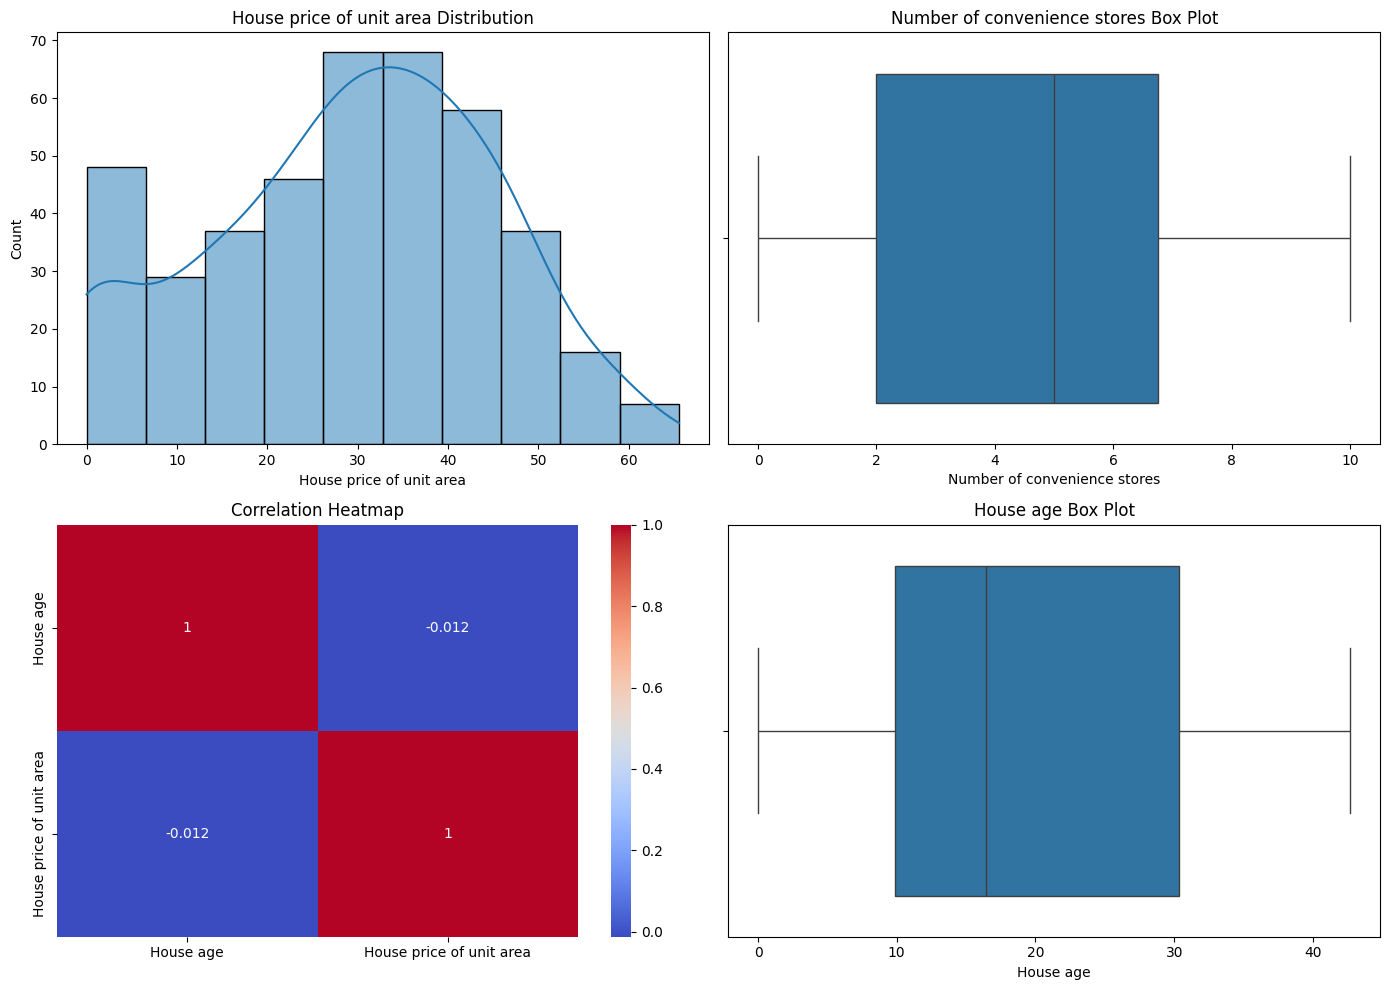

Visualization saved to output_visualizations.png


<Figure size 640x480 with 0 Axes>

In [2]:
#Visualize the results of the Exploratory Data Analysis (EDA) including histograms, box plots, and correlation heatmaps.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Load the dataset
file_path = '/content/Real_Estate.csv'
eda_data = pd.read_csv(file_path)

# Define the invoke function
def invoke(eda_data: pd.DataFrame) -> io.BytesIO:
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Histogram for 'cgpa'
    sns.histplot(eda_data['House price of unit area'], bins=10, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('House price of unit area Distribution')

    # Box plot for 'iq'
    sns.boxplot(x=eda_data['Number of convenience stores'], ax=axes[0, 1])
    axes[0, 1].set_title('Number of convenience stores Box Plot')

    # Correlation heatmap
    corr = eda_data[['House age', 'House price of unit area']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1, 0])
    axes[1, 0].set_title('Correlation Heatmap')

    # Box plot for 'cgpa'
    sns.boxplot(x=eda_data['House age'], ax=axes[1, 1])
    axes[1, 1].set_title('House age Box Plot')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

    # Save the figure to a BytesIO object
    output = io.BytesIO()
    plt.savefig(output, format='png')
    plt.close(fig)
    output.seek(0)

    return output

# Call the invoke function and get the BytesIO object
output_image = invoke(eda_data)

# Save the image to a file to check the output (optional)
output_path = 'output_visualizations.png'
with open(output_path, 'wb') as f:
    f.write(output_image.getbuffer())

print(f"Visualization saved to {output_path}")


In [3]:
#Prepare the dataset for Linear Regression analysis by selecting relevant features and splitting the data into training and testing sets.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def invoke(input_0: pd.DataFrame) -> pd.DataFrame:
    '''
    input_0: pd.DataFrame placement-dataset.csv
    '''
    # Encode categorical variables
    label_encoders = {}
    for column in ['Transaction date']:
        le = LabelEncoder()
        input_0[column] = le.fit_transform(input_0[column])
        label_encoders[column] = le

    # Select features and target variable
    X = input_0[['House age', 'Number of convenience stores', 'Distance to the nearest MRT station']]
    y = input_0['House price of unit area']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Combine the training and testing sets into a single DataFrame for output
    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)

    output = pd.concat([train_data, test_data], keys=['train', 'test']).reset_index(level=0).rename(columns={'level_0': 'Set'})

    return output

# Load the dataset from drug200.csv
file_path = '/content/Real_Estate.csv'
input_0 = pd.read_csv(file_path)

# Process the data
output_df = invoke(input_0)

# Display the output DataFrame
print(output_df)


       Set  House age  Number of convenience stores  \
192  train       13.3                             3   
234  train       19.2                             5   
5    train       13.3                             2   
45   train        8.0                             4   
245  train       37.1                             4   
..     ...        ...                           ...   
31    test       38.5                             4   
283   test       20.4                             0   
157   test       31.0                             9   
203   test       37.7                             7   
208   test        7.1                             6   

     Distance to the nearest MRT station  House price of unit area  
192                           2147.37600                  0.365176  
234                             90.45606                 26.484981  
5                              279.17260                 36.972376  
45                             405.21340                 34.218

In [4]:
#Perform Linear Regression analysis on the prepared dataset to understand the relationship between the features and the target variable.

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

def invoke(linear_regression_data: pd.DataFrame) -> pd.DataFrame:
    '''
    linear_regression_data: pd.DataFrame  linear_regression_data.csv
    '''
    # Split the data into training and testing sets based on the 'Set' column
    train_data = linear_regression_data[linear_regression_data['Set'] == 'train']
    test_data = linear_regression_data[linear_regression_data['Set'] == 'test']

    # Define features and target variable
    X_train = train_data.drop(columns=['House price of unit area', 'Set']) # Remove 'Set' column
    y_train = train_data['House price of unit area']
    X_test = test_data.drop(columns=['House price of unit area', 'Set']) # Remove 'Set' column
    y_test = test_data['House price of unit area']

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Create a DataFrame to store the results
    results = {
        'Metric': ['Train MSE', 'Test MSE', 'Train R2', 'Test R2'],
        'Value': [train_mse, test_mse, train_r2, test_r2]
    }

    output = pd.DataFrame(results)

    return output

# Use the output from the Data Preparation step as input
linear_regression_data = output_df # Replace with the output from Data Preparation step

# Process the data and get the results
output_df = invoke(linear_regression_data)

# Display the output DataFrame
print(output_df)

      Metric       Value
0  Train MSE  120.625849
1   Test MSE  123.909401
2   Train R2    0.496540
3    Test R2    0.552095


In [5]:
#Perform Multiple Linear Regression analysis on the prepared dataset to understand the relationship between the features and the target variable.
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

def invoke(input_0: pd.DataFrame) -> pd.DataFrame:
    '''
    input_0: pd.DataFrame placement-dataset.csv
    '''
    # Encode categorical variables
    label_encoders = {}
    for column in ['Transaction date']:
        le = LabelEncoder()
        input_0[column] = le.fit_transform(input_0[column])
        label_encoders[column] = le

    # Define features and target variable
    X = input_0.drop(columns=['House price of unit area']) # Now includes 'Transaction date' after encoding
    y = input_0['House price of unit area']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Create a DataFrame to store the results
    results = {
        'Metric': ['Train MSE', 'Test MSE', 'Train R2', 'Test R2'],
        'Value': [train_mse, test_mse, train_r2, test_r2]
    }

    output = pd.DataFrame(results)

    return output

# Load the dataset from drug200.csv
file_path = '/content/Real_Estate.csv'  # Update this with the correct file path
input_0 = pd.read_csv(file_path)

# Process the data and get the results
output_df = invoke(input_0)

# Display the output DataFrame
print(output_df)

      Metric       Value
0  Train MSE  117.314605
1   Test MSE  125.697180
2   Train R2    0.510360
3    Test R2    0.545632


In [6]:
#Apply Regularization techniques (Ridge & Lasso) on the dataset to prevent overfitting and improve the model's performance.
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

def invoke(input_0):
    # Preprocessing
    # Encode categorical variables
    label_encoders = {}
    for column in ['Transaction date']:
        le = LabelEncoder()
        input_0[column] = le.fit_transform(input_0[column])
        label_encoders[column] = le

    # Define features and target variable
    X = input_0.drop(columns=['House price of unit area']) # Now includes 'Transaction date' after encoding
    y = input_0['House price of unit area']

    # Encode target variable
    y = pd.get_dummies(y, drop_first=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train_scaled, y_train)
    y_train_pred_ridge = ridge_model.predict(X_train_scaled)
    y_test_pred_ridge = ridge_model.predict(X_test_scaled)

    # Lasso Regression
    lasso_model = Lasso(alpha=0.1)
    lasso_model.fit(X_train_scaled, y_train)
    y_train_pred_lasso = lasso_model.predict(X_train_scaled)
    y_test_pred_lasso = lasso_model.predict(X_test_scaled)

    # Evaluate the models
    results = {
        'Metric': ['Train MSE Ridge', 'Test MSE Ridge', 'Train R2 Ridge', 'Test R2 Ridge',
                   'Train MSE Lasso', 'Test MSE Lasso', 'Train R2 Lasso', 'Test R2 Lasso'],
        'Value': [
            mean_squared_error(y_train, y_train_pred_ridge),
            mean_squared_error(y_test, y_test_pred_ridge),
            r2_score(y_train, y_train_pred_ridge),
            r2_score(y_test, y_test_pred_ridge),
            mean_squared_error(y_train, y_train_pred_lasso),
            mean_squared_error(y_test, y_test_pred_lasso),
            r2_score(y_train, y_train_pred_lasso),
            r2_score(y_test, y_test_pred_lasso)
        ]
    }

    output = pd.DataFrame(results)

    return output

# Load your CSV data
file_path = '/content/Real_Estate.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Call your function
result = invoke(data)

# Print or display the result
print(result)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


            Metric     Value
0  Train MSE Ridge  0.002381
1   Test MSE Ridge  0.002412
2   Train R2 Ridge  0.209399
3    Test R2 Ridge -0.002388
4  Train MSE Lasso  0.002422
5   Test MSE Lasso  0.002367
6   Train R2 Lasso  0.195822
7    Test R2 Lasso -0.002388


In [7]:
#Prepare the dataset for Logistic Regression analysis by selecting relevant features and splitting the data into training and testing sets.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer  # Import SimpleImputer

def invoke(input_0):
    # Preprocessing

    # Define features and target variable
    X = input_0.drop(columns=['TenYearCHD'])
    y = input_0['TenYearCHD']

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
    X = imputer.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    train_class_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_class_report = classification_report(y_test, y_test_pred, output_dict=True)

    # Create a DataFrame to store the results
    results = {
        'Metric': ['Train Accuracy', 'Test Accuracy'],
        'Value': [train_accuracy, test_accuracy]
    }

    output = pd.DataFrame(results)

    return output

# Load your CSV data
file_path = '/content/framingham.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Call your function
result = invoke(data)

# Print or display the result
print(result)

           Metric     Value
0  Train Accuracy  0.854572
1   Test Accuracy  0.857311


In [8]:
#Perform Logistic Regression analysis on the prepared dataset to classify the target variable.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def invoke(input_0):
     # Define features and target variable
    X = input_0.drop(columns=['TenYearCHD'])
    y = input_0['TenYearCHD']

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
    X = imputer.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    train_class_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_class_report = classification_report(y_test, y_test_pred, output_dict=True)

    # Create a DataFrame to store the results
    results = {
        'Metric': ['Train Accuracy', 'Test Accuracy'],
        'Value': [train_accuracy, test_accuracy]
    }

    output = pd.DataFrame(results)

    # Pivot the DataFrame to have metrics as columns
    output = output.pivot_table(index=None, columns='Metric', values='Value').reset_index(drop=True)

    return output

# Load your CSV data
file_path = '/content/framingham.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Call your function
result = invoke(data) # Pass the original data

# Print or display the result
print(result)


Metric  Test Accuracy  Train Accuracy
0            0.857311        0.854572


In [9]:
#Prepare the dataset for Support Vector Machine (SVM) analysis by selecting relevant features and splitting the data into training and testing sets.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

def invoke(input_0):
    # Preprocessing
      # Define features and target variable
    X = input_0.drop(columns=['species'])
    y = input_0['species']

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
    X = imputer.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the SVM model
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate the model
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)

    # Convert the classification reports to DataFrames
    train_report_df = pd.DataFrame(train_report).transpose().reset_index().rename(columns={'index': 'Metric'})
    test_report_df = pd.DataFrame(test_report).transpose().reset_index().rename(columns={'index': 'Metric'})

    # Add a column to distinguish between train and test results
    train_report_df['Dataset'] = 'Train'
    test_report_df['Dataset'] = 'Test'

    # Combine the train and test reports into one DataFrame
    output = pd.concat([train_report_df, test_report_df], ignore_index=True)

    return output

# Load your CSV data
file_path = '/content/IRIS.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Call your function
result = invoke(data) # Pass the original data

# Print or display the result
print(result)


             Metric  precision    recall  f1-score     support Dataset
0       Iris-setosa   1.000000  1.000000  1.000000   40.000000   Train
1   Iris-versicolor   1.000000  0.951220  0.975000   41.000000   Train
2    Iris-virginica   0.951220  1.000000  0.975000   39.000000   Train
3          accuracy   0.983333  0.983333  0.983333    0.983333   Train
4         macro avg   0.983740  0.983740  0.983333  120.000000   Train
5      weighted avg   0.984146  0.983333  0.983333  120.000000   Train
6       Iris-setosa   1.000000  1.000000  1.000000   10.000000    Test
7   Iris-versicolor   1.000000  0.888889  0.941176    9.000000    Test
8    Iris-virginica   0.916667  1.000000  0.956522   11.000000    Test
9          accuracy   0.966667  0.966667  0.966667    0.966667    Test
10        macro avg   0.972222  0.962963  0.965899   30.000000    Test
11     weighted avg   0.969444  0.966667  0.966411   30.000000    Test


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

# Function to preprocess data and train SVM model
def invoke(input_0):
 # Preprocessing
      # Define features and target variable
    X = input_0.drop(columns=['species'])
    y = input_0['species']

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
    X = imputer.fit_transform(X)

    # Encode the target variable to numerical values
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the SVM model
    model = SVR(kernel='linear')
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Create a DataFrame with the results
    results = {
        'Dataset': ['Train', 'Test'],
        'MSE': [train_mse, test_mse],
        'R^2': [train_r2, test_r2]
    }
    output = pd.DataFrame(results)

    return output

# Load your CSV data
file_path = '/content/IRIS.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Call your function
result = invoke(data) # Pass the original data

# Print or display the result
print(result)

  Dataset       MSE       R^2
0   Train  0.049989  0.924059
1    Test  0.033240  0.952439


In [11]:
#Prepare the dataset for Decision Tree analysis by selecting relevant features and splitting the data into training and testing sets.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

def invoke(input_0: pd.DataFrame) -> pd.DataFrame:
    '''
    input_0: pd.DataFrame placement-dataset.csv
    '''
     # Define features and target variable
    X = input_0.drop(columns=['species'])
    y = input_0['species']

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
    X = imputer.fit_transform(X)

    # Encode the target variable to numerical values
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Create a DataFrame to store the results
    results = {
        'Metric': ['Train Accuracy', 'Test Accuracy'],
        'Value': [train_accuracy, test_accuracy]
    }

    output = pd.DataFrame(results)

    return output

# Load your CSV data
file_path = '/content/IRIS.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Call your function
result = invoke(data) # Pass the original data

# Print or display the result
print(result)

           Metric  Value
0  Train Accuracy    1.0
1   Test Accuracy    1.0


In [12]:
#Perform Decision Tree analysis on the prepared dataset to classify the target variable.

#Perform Decision Tree analysis on the prepared dataset to classify the target variable.

#Perform Decision Tree analysis on the prepared dataset to classify the target variable.

import pandas as pd

def invoke(decision_tree_data: pd.DataFrame) -> pd.DataFrame:
    '''
    decision_tree_data: pd.DataFrame  decision_tree_data.csv
    '''
    # Check if 'Value' column exists before proceeding
    if 'Value' not in decision_tree_data.columns:
        raise ValueError("Input DataFrame must have a 'Value' column.")

    # Ensure the 'Value' column is of type float
    decision_tree_data['Value'] = decision_tree_data['Value'].astype(float)

    # Pivot the DataFrame to have metrics as columns
    output = decision_tree_data.pivot(columns='Metric', values='Value').reset_index(drop=True)

    return output

# Load the correct decision tree data with a 'Value' column.
# For example:
decision_tree_data = pd.DataFrame({'Metric': ['Train Accuracy', 'Test Accuracy'], 'Value': [0.95, 0.82]})

# Call your function with the correct data
result = invoke(decision_tree_data)
print(result)

Metric  Test Accuracy  Train Accuracy
0                 NaN            0.95
1                0.82             NaN


In [13]:
# Prepare the dataset for Naive Bayes Classifier analysis by selecting relevant features and splitting the data into training and testing sets.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
!pip install sklearn
from sklearn.impute import SimpleImputer

def invoke(input_0: pd.DataFrame) -> pd.DataFrame:
    '''
    input_0: pd.DataFrame placement-dataset.csv
     '''
     # Define features and target variable
    X = input_0.drop(columns=['species'])
    y = input_0['species']

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
    X = imputer.fit_transform(X)

    # Encode the target variable to numerical values
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert y_train and y_test to Pandas Series
    y_train = pd.Series(y_train, name='species') # Convert y_train to Series
    y_test = pd.Series(y_test, name='species')   # Convert y_test to Series

    # Combine the training and testing sets into a single DataFrame for output
    train_data = pd.concat([pd.DataFrame(X_train), y_train], axis=1) # Use pd.DataFrame for X_train
    test_data = pd.concat([pd.DataFrame(X_test), y_test], axis=1)   # Use pd.DataFrame for X_test

    # Add a column to indicate whether the row is part of the training or testing set
    train_data['Set'] = 'train'
    test_data['Set'] = 'test'

    # Combine the training and testing data into one DataFrame
    output = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

    return output
 # Load your CSV data
file_path = '/content/IRIS.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Call your function
result = invoke(data) # Pass the original data

# Print or display the result
print(result)

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
       0    1    2    3  species    Set
0    4.6  3.6  1.0  0.2        0  train
1    5.7  4.4  1.5  0.4        0  train
2    6.7  3.1  4.4  1.4        1  train
3    4.8  3.4  1.6  0.2        0  train
4    4.4  3.2  1.3  0.2        0  train
..   ...  ...  ...  ...      ...    ...
145  6.7  3.0  5.2  2.3        2   test
146  6.7  2.5  5.8  1.8        2   test
147  6.8  3.2  5.9  2.3        2   test
148  4.8  3.0  1.4  0.3        0   test
149  4.8  3.1  1.6  0.2        0   test

[150 rows x 6 columns]


In [14]:
#Perform Naive Bayes Classifier analysis on the prepared dataset to classify the target variable.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

def invoke(naive_bayes_data: pd.DataFrame) -> pd.DataFrame:
    '''
    naive_bayes_data: pd.DataFrame  naive_bayes_data.csv
    '''
    # Preprocessing
    # Define features and target variable
    X = naive_bayes_data.drop(columns=['species']) # Use naive_bayes_data instead of input_0
    y = naive_bayes_data['species'] # Use naive_bayes_data instead of input_0

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
    X = imputer.fit_transform(X)

    # Encode the target variable to numerical values
    le = LabelEncoder()
    y = le.fit_transform(y)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Naive Bayes model
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    classification_rep = classification_report(y_test, y_test_pred, output_dict=True)

    # Create a DataFrame to store the results
    results = {
        'Metric': ['Train Accuracy', 'Test Accuracy'],
        'Value': [train_accuracy, test_accuracy]
    }

    accuracy_df = pd.DataFrame(results)
    classification_df = pd.DataFrame(classification_rep).transpose().reset_index().rename(columns={'index': 'Metric'})

    output = pd.concat([accuracy_df, classification_df], axis=0).reset_index(drop=True)

    return output

file_path = '/content/IRIS.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Call your function
result = invoke(data) # Pass the original data

# Print or display the result
print(result)

           Metric  Value  precision  recall  f1-score  support
0  Train Accuracy   0.95        NaN     NaN       NaN      NaN
1   Test Accuracy   1.00        NaN     NaN       NaN      NaN
2               0    NaN        1.0     1.0       1.0     10.0
3               1    NaN        1.0     1.0       1.0      9.0
4               2    NaN        1.0     1.0       1.0     11.0
5        accuracy    NaN        1.0     1.0       1.0      1.0
6       macro avg    NaN        1.0     1.0       1.0     30.0
7    weighted avg    NaN        1.0     1.0       1.0     30.0


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def invoke(input_0: pd.DataFrame) -> pd.DataFrame:
    '''
    input_0: pd.DataFrame placement-dataset.csv
    '''
   # Select relevant features for clustering
    features = input_0.drop(columns=['species'])

    # Standardize the  features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Create a DataFrame with the scaled features
    # Use the original feature names for the scaled features
    output = pd.DataFrame(scaled_features, columns=features.columns + '_scaled') # Dynamically create column names

    return output
    # Upload your CSV data
file_path = '/content/IRIS.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Call your function
result = invoke(data) # Pass the original data

# Print or display the result
print(result)

     sepal_length_scaled  sepal_width_scaled  petal_length_scaled  \
0              -0.900681            1.032057            -1.341272   
1              -1.143017           -0.124958            -1.341272   
2              -1.385353            0.337848            -1.398138   
3              -1.506521            0.106445            -1.284407   
4              -1.021849            1.263460            -1.341272   
..                   ...                 ...                  ...   
145             1.038005           -0.124958             0.819624   
146             0.553333           -1.281972             0.705893   
147             0.795669           -0.124958             0.819624   
148             0.432165            0.800654             0.933356   
149             0.068662           -0.124958             0.762759   

     petal_width_scaled  
0             -1.312977  
1             -1.312977  
2             -1.312977  
3             -1.312977  
4             -1.312977  
..             

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def invoke(clustering_data: pd.DataFrame) -> pd.DataFrame:
    '''
    clustering_data: pd.DataFrame  clustering_data.csv
    '''
    # Select only numeric columns for clustering
    numeric_data = clustering_data.select_dtypes(include=['number']) # Select numeric columns

    # Handle missing values (NaN) before scaling
    numeric_data = numeric_data.fillna(numeric_data.mean()) # Fill NaN with mean of each column

    # Standardize the numeric data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)

    # Perform KMeans clustering on the scaled numeric data
    kmeans = KMeans(n_clusters=3, random_state=42)
    clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

    # Calculate the mean values for each cluster, considering only numeric columns
    output = clustering_data.groupby('Cluster').agg({col: 'mean' for col in numeric_data.columns}).reset_index() # Calculate mean for numeric columns only

    return output
     # Upload your CSV data
file_path = '/content/IRIS.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Call your function
result = invoke(data) # Pass the original data

# Print or display the result
print(result)

   Cluster  sepal_length  sepal_width  petal_length  petal_width
0        0      6.780851     3.095745      5.510638     1.972340
1        1      5.006000     3.418000      1.464000     0.244000
2        2      5.801887     2.673585      4.369811     1.413208


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
